In [6]:
# import libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scrapy  
import seaborn as sns
from numpy.random import randn # randn()
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,4
import warnings
warnings.filterwarnings('ignore')
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings('ignore', category = RRuntimeWarning)

In [8]:
from sklearn import datasets

In [10]:
from rpy2.robjects import pandas2ri
pandas2ri.activate() # pip install tzlocal if required & import tzlocal

In [15]:
age = np.random.uniform(0, 18, size = 50)
height = 22 + 8.6 * age + np.random.normal(size = 50, scale = 10)
growing = pd.DataFrame({'age': age, 'height': height})
growing.head()

,age,height
0,8.436025,94.737093
1,7.551878,102.406744
2,12.610353,117.340482
3,12.061791,119.857601
4,2.198304,42.873804


In [17]:
# Enable R magic.

%load_ext rpy2.ipython

# %reload_ext rpy2.ipython # to reload
# %R  - line magic #(return value as Python object)
# %%R - cell magic #(no return value but can pass data in and out)

# %R , %%R, %Rpush, %%Rpull, %Rget

# Arguments:
# -i - input variable(s)
# -o - output variable(s)
# -h - height of plot
# -w - width of plot

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [18]:
%R R.version$version.string

array(['R version 3.6.1 (2019-07-05)'], dtype='<U28')

In [19]:
%R heights = rnorm(20, 165, 10)

array([166.8844881 , 172.48581217, 145.92562967, 170.68748851,
       180.52442146, 159.86359399, 149.68390851, 149.99754932,
       162.84517197, 167.07319249, 158.15207151, 171.39065254,
       162.43117891, 150.5197004 , 192.7995119 , 162.44400942,
       151.21259583, 151.8560922 , 162.76294698, 165.41736559])

In [23]:
%R head(mtcars) # for R
mtcars = %R mtcars
mtcars.head() # for python

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
1,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
2,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
3,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
4,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


In [27]:
%%R 
R.version

In [ ]:
%%R -i age, height -o coefficients
fit <- lm(height ~ age)
coefficients <- coef(fit)

# Take a look at the coefficients 
print (coefficients)

# That's a R oblect. We can convert It to Python.
pandas2ri.ri2py(coefficients)

In [78]:
# What about accessing the detailed model summary?
%%R
summary(fit)

In [28]:
# for loop
for i in range(5):
    print("Hello Python")

Hello Python
Hello Python
Hello Python
Hello Python
Hello Python


In [61]:
%%R

for (i in c(1:10)){
    print("Season",i)
}

In [56]:
%R print(a)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [57]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

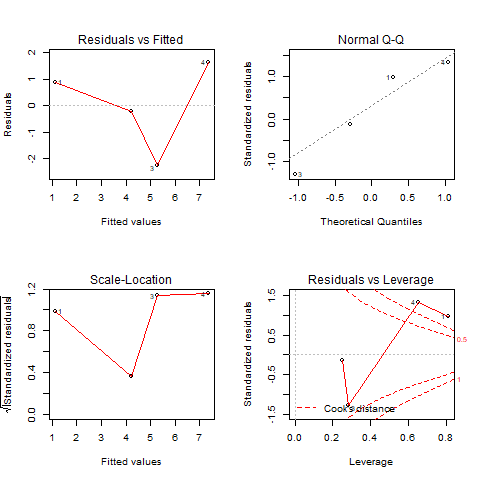

In [74]:
%%R
Y = c(2,4,3,9)
par(mfrow=c(2,2))
plot(lm(Y~X))

In [82]:
# %R summary(lm(Y~X))